In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df =  pd.read_csv("BostonHousing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


`preprocess the data`

In [32]:
# check duplicate row
print(df[df.duplicated()])
# no missing value
# no encoding, itsn't necessary 

Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat, medv]
Index: []


`check correlation`

In [33]:
# creating correlation matrix
correlation_matr = df.corr()

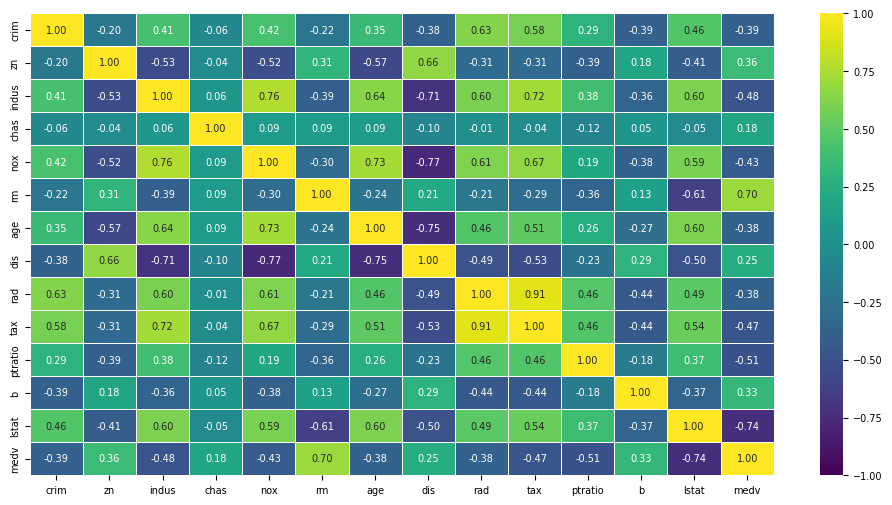

In [34]:
# plot correlation graph
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size':7}) # to handle the font of number in earch square
sns.heatmap(correlation_matr, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", linewidths=.5)
plt.show()

In [35]:
# indentifying the features for target variable
#rm, istal, ptrtio, indus
x = df[["rm","lstat","ptratio"]]
y = df[["medv"]] 
xmin = np.min(x)
xmax = np.max(x)
xmean = np.mean(x)
x = x.to_numpy()
y = y.to_numpy()

`Visualization`

Text(0, 0.5, 'MEDV')

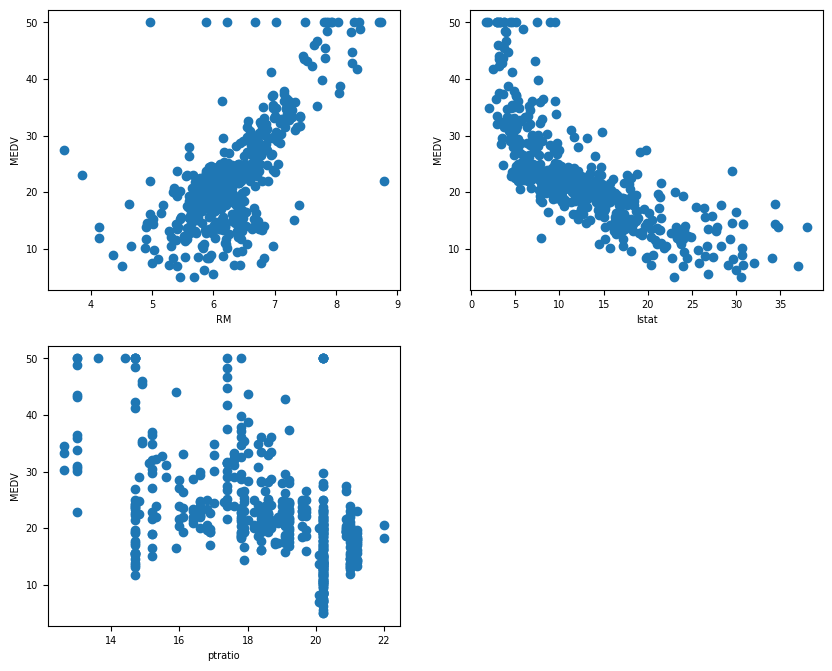

In [36]:
# creating scatter plot
fig = plt.figure(figsize=(10,8))
# for 1
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(x[:,0],y)
ax1.set_xlabel("RM")
ax1.set_ylabel("MEDV")

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(x[:,1],y)
ax2.set_xlabel("lstat")
ax2.set_ylabel("MEDV")

ax3 = fig.add_subplot(2,2,3)
ax3.scatter(x[:,2],y)
ax3.set_xlabel("ptratio")
ax3.set_ylabel("MEDV")



`Spliting Data`

In [37]:
data = np.hstack((x,y))
np.random.shuffle(data)

dt_tr = data[:int(len(x)*0.8),:]
dt_te =  data[int(len(x)*0.8):,:]

x_tr = dt_tr[:,:-1]
y_tr = dt_tr[:,-1]
xte = dt_te[:,:-1]
yte =  dt_te[:,-1]

In [38]:
def hypo_function(a,b,c,d,x):
    return a*x[:,0] + b*x[:,1] + c*x[:,2] + d
def cost_function(pred,y):
    cost = (pred - y)**2
    cost = cost.mean()
    return cost
def derivate_a(hyp,y,x):
    return 2*np.mean((hyp - y)*x[:,0])
def derivate_b(hyp,y,x):
    return 2*np.mean((hyp - y)*x[:,1])
def derivate_c(hyp,y,x):
    return 2*np.mean((hyp - y)*x[:,2])
def derivate_d(hyp,y):
    return 2*np.mean(hyp - y)

In [43]:
a,b,c,d = 1,1,1,1
lr = 0.001
eporch = 100
for i in range(eporch):
    hypo = (hypo_function(a,b,c,d,x_tr))
    cost_val = cost_function(hypo,y_tr)
    print(f"for i={i}, cost_value = {cost_val}")
    a -= lr*derivate_a(hypo,y_tr,x_tr)
    b -= lr*derivate_b(hypo,y_tr,x_tr)
    c -= lr*derivate_c(hypo,y_tr,x_tr)
    d -= lr*derivate_d(hypo,y_tr)
    

for i=0, cost_value = 511.5698149851485
for i=1, cost_value = 161.73609331998344
for i=2, cost_value = 143.5426098581528
for i=3, cost_value = 132.3173217088561
for i=4, cost_value = 122.59893452655017
for i=5, cost_value = 114.11957918816707
for i=6, cost_value = 106.71856065191058
for i=7, cost_value = 100.25705338863965
for i=8, cost_value = 94.6141277751782
for i=9, cost_value = 89.6844268376438
for i=10, cost_value = 85.37616060012341
for i=11, cost_value = 81.60935900698831
for i=12, cost_value = 78.31434982784135
for i=13, cost_value = 75.43043256848031
for i=14, cost_value = 72.90472314736402
for i=15, cost_value = 70.69114734745975
for i=16, cost_value = 68.74956388510259
for i=17, cost_value = 67.04500040459409
for i=18, cost_value = 65.54698785666464
for i=19, cost_value = 64.22898059153746
for i=20, cost_value = 63.0678511288004
for i=21, cost_value = 62.04344998767012
for i=22, cost_value = 61.13822219957604
for i=23, cost_value = 60.336873203866965
for i=24, cost_value = 

In [62]:
hypo_test = hypo_function(a,b,c,d,xte)
print(cost_function(hypo_test,yte))

33.09959347887202
